<h3>Libraries to import </h3>

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import joblib

<h3>Loading data</h3>

In [67]:
data = pd.read_csv("N:\\adult 3.csv")

In [68]:
data.shape

(48842, 15)

In [69]:
data.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [70]:
data.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [71]:
data.education.value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

<h3>Data Cleaning</h3>

In [72]:
data=data[data["workclass"]!="Without-pay"]
data=data[data["workclass"]!="Never-worked"]

In [73]:
data=data[data.education!="Preschool"]
data=data[data.education!="1st-4th"]
data=data[data.education!="5th-6th"]

In [74]:
data.drop(columns='education',inplace=True)

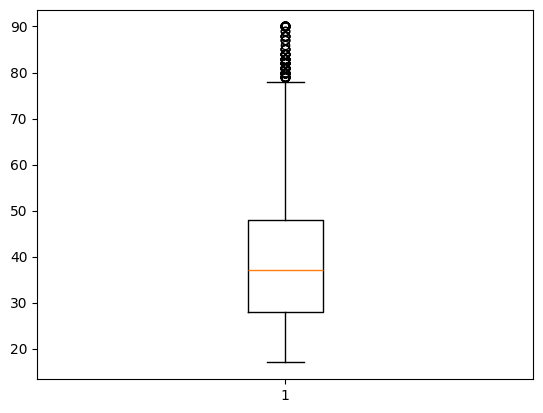

In [75]:
plt.boxplot(data["age"])
plt.show()

In [76]:
data =data[(data.age<=75)&(data.age>=17)]

<h3>Encoding</h3>

In [77]:
encoder=LabelEncoder()
data["workclass"]=encoder.fit_transform(data["workclass"])
data["marital-status"]=encoder.fit_transform(data["marital-status"])
data["occupation"]=encoder.fit_transform(data["occupation"])
data["relationship"]=encoder.fit_transform(data["relationship"])
data["race"]=encoder.fit_transform(data["race"])
data["gender"]=encoder.fit_transform(data["gender"])
data["native-country"]=encoder.fit_transform(data["native-country"])

<h3>Split Data</h3>

In [78]:
X = data.drop(columns="income")
y = data["income"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

<h3>Training models through pipeline library</h3>

In [79]:
models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

LogisticRegression Accuracy: 0.8249
              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      7206
        >50K       0.72      0.46      0.56      2318

    accuracy                           0.82      9524
   macro avg       0.78      0.70      0.73      9524
weighted avg       0.81      0.82      0.81      9524

RandomForest Accuracy: 0.8616
              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.91      7206
        >50K       0.76      0.63      0.69      2318

    accuracy                           0.86      9524
   macro avg       0.82      0.78      0.80      9524
weighted avg       0.86      0.86      0.86      9524

KNN Accuracy: 0.8319
              precision    recall  f1-score   support

       <=50K       0.88      0.91      0.89      7206
        >50K       0.67      0.60      0.63      2318

    accuracy                           0.83      9524
   macro avg       0.77      0.75      0.

<h3>Visulaization</h3>

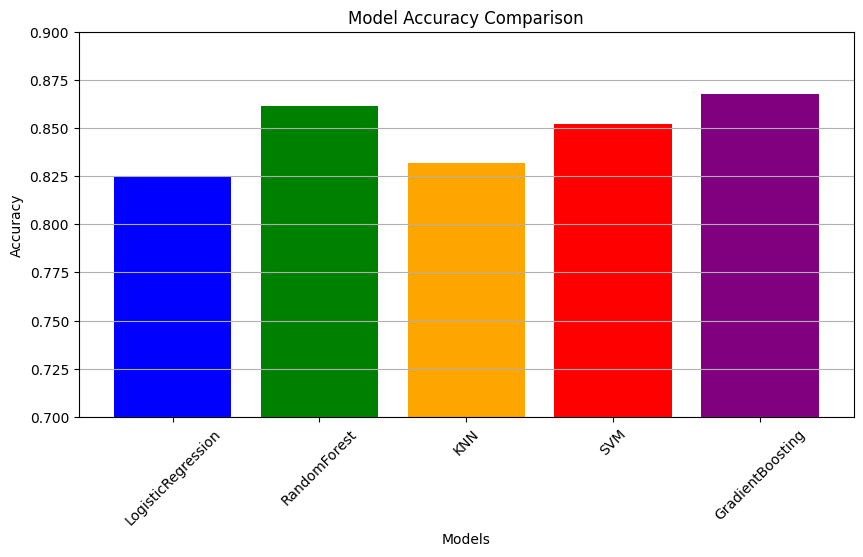

In [80]:
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'orange', 'red', 'purple'])
plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0.7, 0.9)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


<h3>Making Pkl file for best Model</h3>

In [81]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n✅ Best model: {best_model_name} with accuracy {results[best_model_name]:.4f}")

# Save the best model
joblib.dump(best_model, "best_model.pkl")
print("✅ Saved best model as best_model.pkl")


✅ Best model: GradientBoosting with accuracy 0.8675
✅ Saved best model as best_model.pkl


<h3>Making of Streamlit Application</h3>

In [96]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder

# Loading model
model = joblib.load("best_model.pkl")

# Mapping features values as we have encoded these values while model training
education_map = {
    "HS-grad":0, "Some-college":1, "Bachelors":2, "Masters":3,
    "Assoc-voc":4, "11th":5, "Assoc-acdm":6, "10th":7, "7th-8th":8,
    "Prof-school":9, "9th":10, "12th":11, "Doctorate":12
}

workclass_list = ["Private","Self-emp-not-inc","Local-gov","State-gov","Federal-gov"]
marital_list = ["Married-civ-spouse","Divorced","Never-married","Separated","Widowed"]
occupation_list = ["Tech-support","Craft-repair","Other-service","Sales",
                 "Exec-managerial","Prof-specialty","Handlers-cleaners",
                 "Machine-op-inspct","Adm-clerical","Farming-fishing",
                 "Transport-moving","Priv-house-serv","Protective-serv","Armed-Forces"]
relationship_list = ["Husband","Wife","Not-in-family","Other-relative"]
race_list = ["White","Black","Asian-Pac-Islander","Amer-Indian-Eskimo","Other"]
country_list = ["United-States","Mexico","Philippines","Germany","Canada"]

# Encoders
workclass_enc = LabelEncoder().fit(workclass_list)
marital_enc = LabelEncoder().fit(marital_list)
occupation_enc = LabelEncoder().fit(occupation_list)
relationship_enc = LabelEncoder().fit(relationship_list)
race_enc = LabelEncoder().fit(race_list)
country_enc = LabelEncoder().fit(country_list)


st.set_page_config(page_title="Income Predictor", page_icon="💰", layout="centered")
st.title("💰 Income Predictor")
st.write("Predict whether annual income exceeds $50K")

# Sidebar
with st.sidebar:
    st.header("Personal Details")
    age = st.slider("Age", 17, 75, 30)
    workclass = st.selectbox("Work Class", workclass_list)
    education = st.selectbox("Education Level", list(education_map.keys()))
    marital = st.selectbox("Marital Status", marital_list)
    occupation = st.selectbox("Occupation", occupation_list)
    relationship = st.selectbox("Relationship", relationship_list)
    race = st.selectbox("Race", race_list)
    gender = st.selectbox("Gender", ["Male","Female"])
    capital_gain = st.number_input("Capital Gain", 0, 100000, 0)
    capital_loss = st.number_input("Capital Loss", 0, 10000, 0)
    hours = st.slider("Hours per Week", 1, 100, 40)
    country = st.selectbox("Native Country", country_list)
    fnlwgt = st.number_input("Final Weight (fnlwgt)", 10000, 1000000, 200000)

# Main Screen
st.subheader("Your Input Summary")
input_summary = pd.DataFrame({
    "Feature": ["Age", "Work Class", "Education", "Marital Status", "Occupation",
               "Relationship", "Race", "Gender", "Capital Gain", "Capital Loss",
               "Hours/Week", "Country", "Final Weight"],
    "Value": [age, workclass, education, marital, occupation,
             relationship, race, gender, capital_gain, capital_loss,
             hours, country, fnlwgt]
})
st.table(input_summary)

# Prediction
if st.button("Predict Income"):
    input_data = {
        'age': age,
        'workclass': workclass_enc.transform([workclass])[0],
        'fnlwgt': fnlwgt,
        'education': education_map[education],
        'marital-status': marital_enc.transform([marital])[0],
        'occupation': occupation_enc.transform([occupation])[0],
        'relationship': relationship_enc.transform([relationship])[0],
        'race': race_enc.transform([race])[0],
        'gender': 1 if gender == "Male" else 0,
        'capital-gain': capital_gain,
        'capital-loss': capital_loss,
        'hours-per-week': hours,
        'native-country': country_enc.transform([country])[0]
    }
    
    prediction = model.predict(pd.DataFrame([input_data]))
    proba = model.predict_proba(pd.DataFrame([input_data]))[0]
    
    st.subheader("Prediction Result")
    if prediction[0] == ">50K":
        st.success(f"✅ High Earner (>$50K) with {proba[1]*100:.1f}% confidence")
    else:
        st.info(f"💼 Moderate Earner (≤$50K) with {proba[0]*100:.1f}% confidence")

st.caption("Model accuracy: ~86.7%")

Overwriting app.py


In [97]:
!streamlit run app.py

^C
